[Scraping avec Python : Formation Complète 2024](https://www.youtube.com/watch?v=sOAZpHDEdkg)

Exercices simples - introduction - 01:04:30

Exercice 1 : déterminer toutes les catégories qui détiennent moins de 5 livres -> récupérer les liens et les noms des catégories ciblées

Pour rappel 'html.parser' : analyse des fichiers .html écrit en langage C plus rapide que le parser suivant mais fonctionne moins bien si les balises du fichier html sont mal formatés

Date : 19-02-24

In [43]:
import requests
from bs4 import BeautifulSoup
from urllib.parse import urljoin # concaténation entre différents url
from pprint import pprint

In [10]:
BASE_URL = 'https://books.toscrape.com/index.html'

Récupération de la balise "nav nav-list"

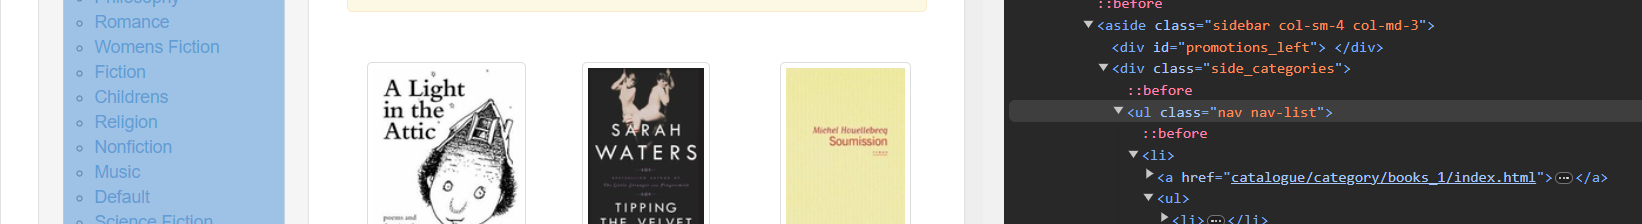

Recours ci-dessous de la méthode select_one qui permet de récupérer des liens à partir de l'identifiant css.
Pour obtenir la liste des référence CSS, lien ci-après :
https://www.w3schools.com/cssref/css_selectors.php

Fonction exécutée ici "soup.select("ul.nav.nav-list a")" est similaire à celle présenter sur le site @ :
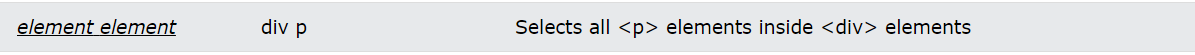

Pour compter le nombre de livres par catégorie, ciblage à partir de la balise article de la classe product_pod

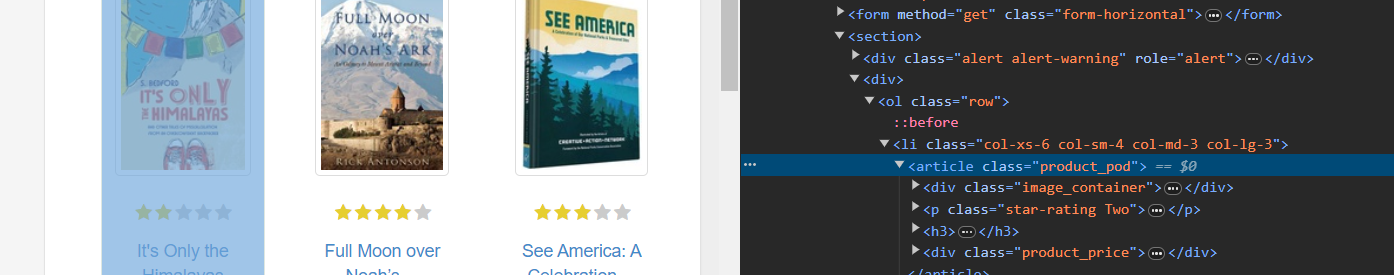

Pour récupérer le nom de la catégorie, recours à la balise h1 :

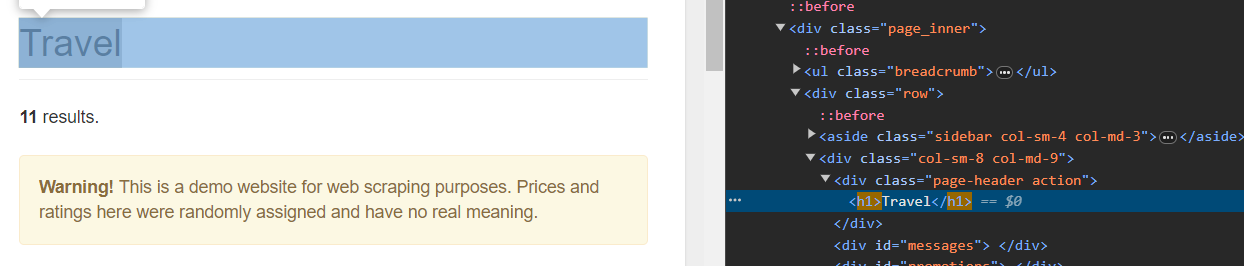

In [66]:
def main(threshold:int = 5):
    """
    arg : nombre de livres avec une valeur par défaut de 5
    """
    
    # Session avec resquest (permet de générer les données plus rapidement)
    # remplacement de l'instruction requests.get() ci-après, par session.get()
    with requests.Session() as session:
    
        # Récupération des données de l'url
        response = session.get(BASE_URL)
        
        # Instanciation du contenu du texte de l'URL ci-avant 
        soup = BeautifulSoup(response.text, 'html.parser')
        
        # 1ère possibilité : récupération de tous les liens commençant par la 
        # balise "a" à partir de la balise "nav nav_list" avec la méthode find() 
        # soup.find("ul", class_="nav nav-list").find_all("a")
        
        # 2ème possibilité : récupération de tous les liens avec la méthode 
        # select() grâce aux identifiants css 
        categories = soup.select("ul.nav.nav-list a")
        
        # Compréhension de liste pour récupérer toutes les url à partir du 2ème
        # composant "Travael" (catégorie "Books" en 1er composant exclu)
        categories_url = [category["href"] for category in categories[1:]]
        
        # pour chaque url "relative" (c-a-d non complète) de chaque catégorie...
        for category_url in categories_url:
            
            # Concaténation de l'url de base avec l'url de chaque catégorie 
            # permettant d'accéder à l'url de chaque catégorie
            absolute_url = urljoin(BASE_URL, category_url)
            
            # Récupération des données de l'url de la catégorie concernée
            response = session.get(absolute_url)
            
            # Instanciation du contenu du texte de l'URL ci-avant 
            soup = BeautifulSoup(response.text, 'html.parser')

            # Récupération de tous les livres par catégorie à partir de
            # la balise "article" de la classe "product_pod"
            books = soup.select("article.product_pod")
            
            # Récupération du titre de chaque catégorie
            category_title = soup.select_one("h1").text
            
            # Assignation d'une variable du nombre de livres dans une catégorie
            number_of_books = len(books)
            
            # Si le nombre de livres dans telle catégorie est < au nombre de 
            # livres ciblé...
            if number_of_books <= threshold:
                print(f"La catégorie \"{category_title}\" ne contient pas assez de livres ({number_of_books}).")
            
            else:
                print(f"La catégorie \"{category_title}\" contient assez de livres.")

In [67]:
main(threshold=5)

La catégorie "Travel" contient assez de livres.
La catégorie "Mystery" contient assez de livres.
La catégorie "Historical Fiction" contient assez de livres.
La catégorie "Sequential Art" contient assez de livres.
La catégorie "Classics" contient assez de livres.
La catégorie "Philosophy" contient assez de livres.
La catégorie "Romance" contient assez de livres.
La catégorie "Womens Fiction" contient assez de livres.
La catégorie "Fiction" contient assez de livres.
La catégorie "Childrens" contient assez de livres.
La catégorie "Religion" contient assez de livres.
La catégorie "Nonfiction" contient assez de livres.
La catégorie "Music" contient assez de livres.
La catégorie "Default" contient assez de livres.
La catégorie "Science Fiction" contient assez de livres.
La catégorie "Sports and Games" ne contient pas assez de livres (5).
La catégorie "Add a comment" contient assez de livres.
La catégorie "Fantasy" contient assez de livres.
La catégorie "New Adult" contient assez de livres.
L